In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import os
from ctapipe.io.lsteventsource import LSTEventSource
from ctapipe.io import EventSeeker
from ctapipe.calib.camera import DragonPedestal
from ctapipe.calib.camera.dragon import remove_pedestal
font = {'family' : 'sans-serif',
        'style':'normal',
        'weight' : 'medium',
        'size'   : 30}
matplotlib.rc('font', **font)
plt.rcParams["font.family"] = "Times New Roman"

# Remove pedestal: module = 0, pixel = 0, high gain

In [4]:
path_to_data = os.path.join("/home", "pawel1", "Pulpit", "Astrophysics", "CTA", "dragon",
                            "data", "dane_lst", "20180629", "Date20180629.0000.fits.fz")

reader = LSTEventSource(input_url=path_to_data)
seeker = EventSeeker(reader)

nr_module = 32
ped = DragonPedestal()

for i in range(0, 5000):
    ev = seeker[i]
    ped.fill_pedestal_event(ev, nr_module)

ped.finalize_pedestal()

/home/pawel1/anaconda3/envs/cta-dev/lib/python3.6/site-packages/protozfits/__init__.py:56: UserWarning:         Multiple open zfits files at the same time are not supported.
        Reading from mutliple open tables at the same time will reset these
        tables continously and you will read always the same events.
        
  ''')
/home/pawel1/Pulpit/Astrophysics/CTA/ctapipe/ctapipe/calib/camera/dragon.py:51: RuntimeWarning: divide by zero encountered in true_divide
  self.meanped = self.meanped/self.numped
/home/pawel1/Pulpit/Astrophysics/CTA/ctapipe/ctapipe/calib/camera/dragon.py:51: RuntimeWarning: invalid value encountered in true_divide
  self.meanped = self.meanped/self.numped
/home/pawel1/Pulpit/Astrophysics/CTA/ctapipe/ctapipe/calib/camera/dragon.py:52: RuntimeWarning: divide by zero encountered in true_divide
  self.rms = self.rms/self.numped
/home/pawel1/Pulpit/Astrophysics/CTA/ctapipe/ctapipe/calib/camera/dragon.py:52: RuntimeWarning: invalid value encountered in true_divi

## Waveform of an event for pixel 0 before and after basic pedestal correction (module 0)

/home/pawel1/anaconda3/envs/cta-dev/lib/python3.6/site-packages/protozfits/__init__.py:56: UserWarning:         Multiple open zfits files at the same time are not supported.
        Reading from mutliple open tables at the same time will reset these
        tables continously and you will read always the same events.
        
  ''')


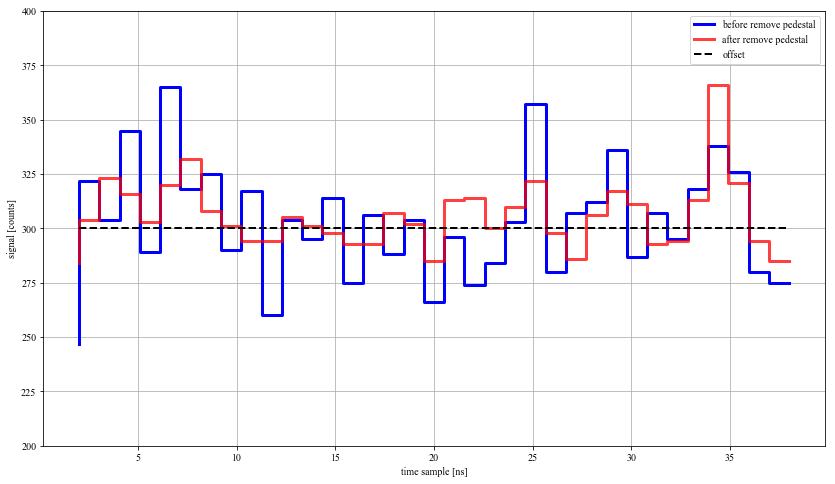

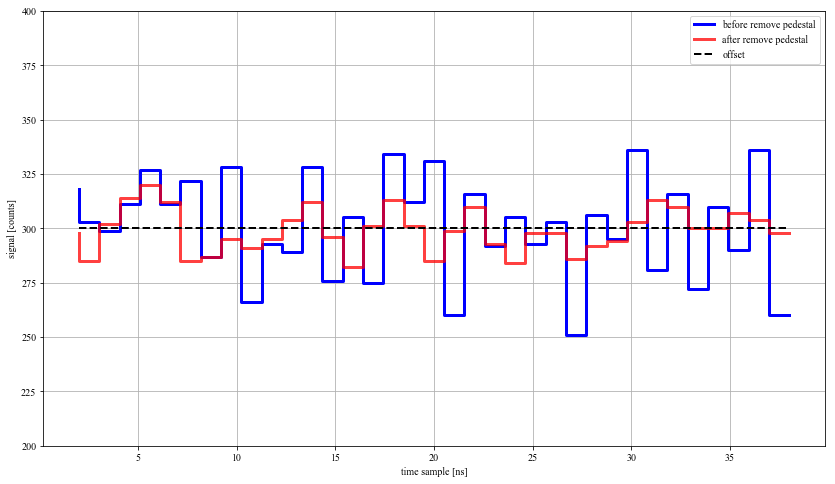

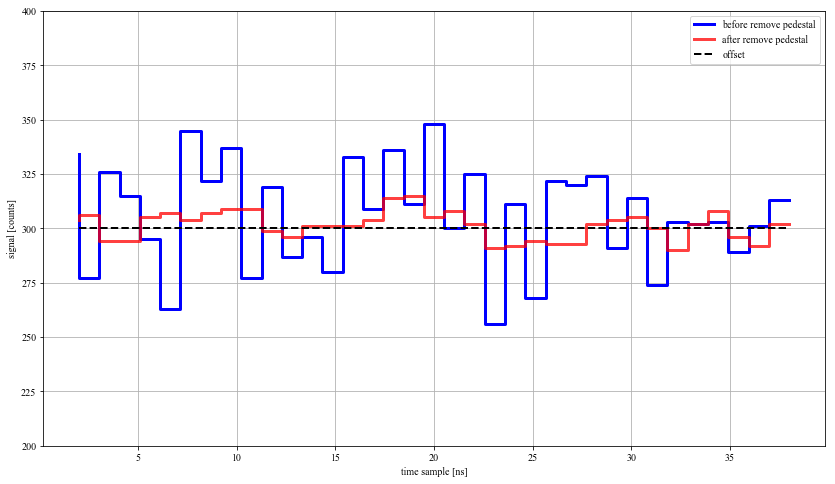

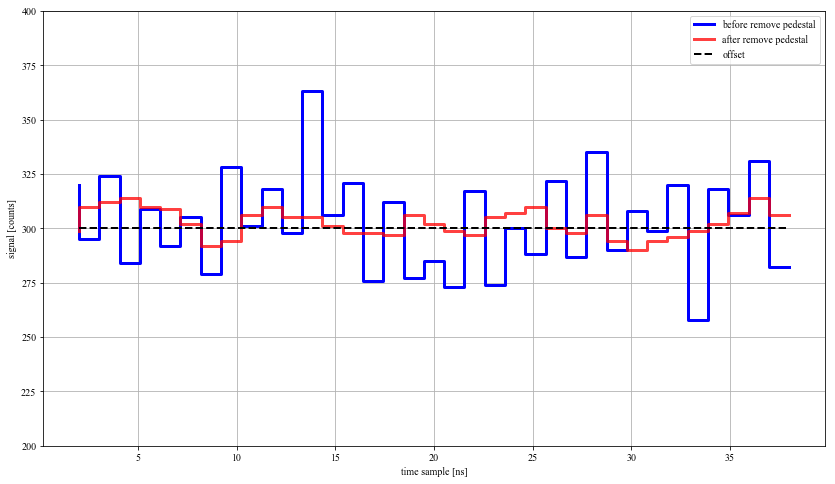

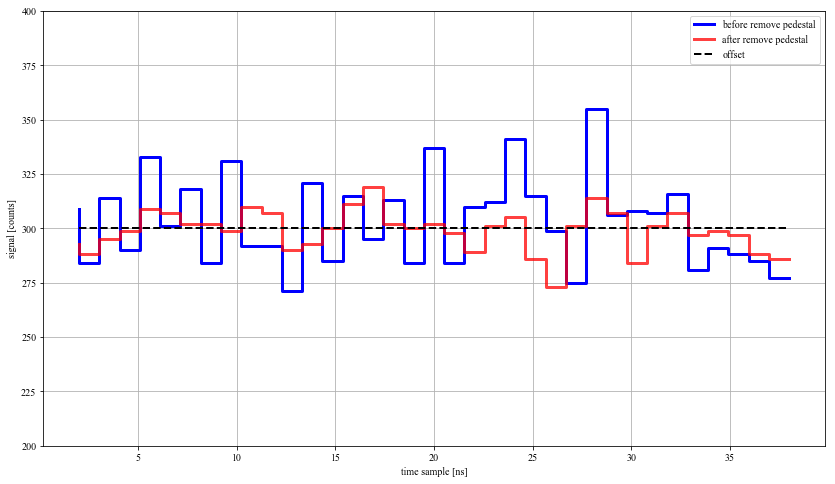

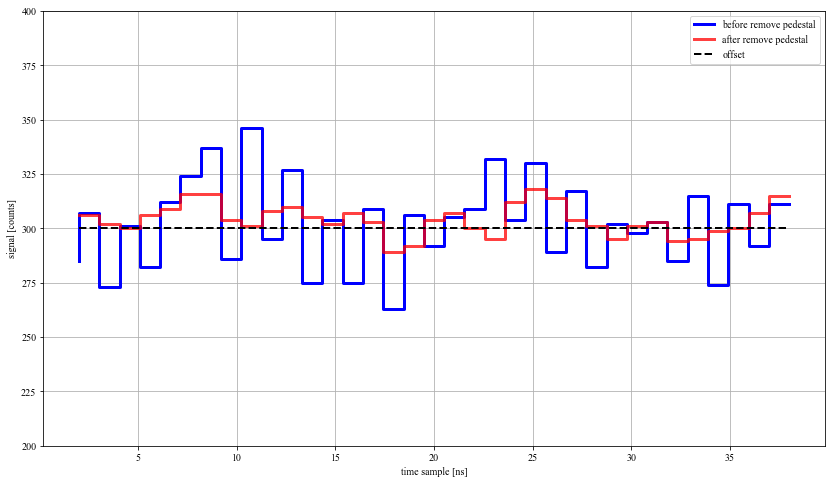

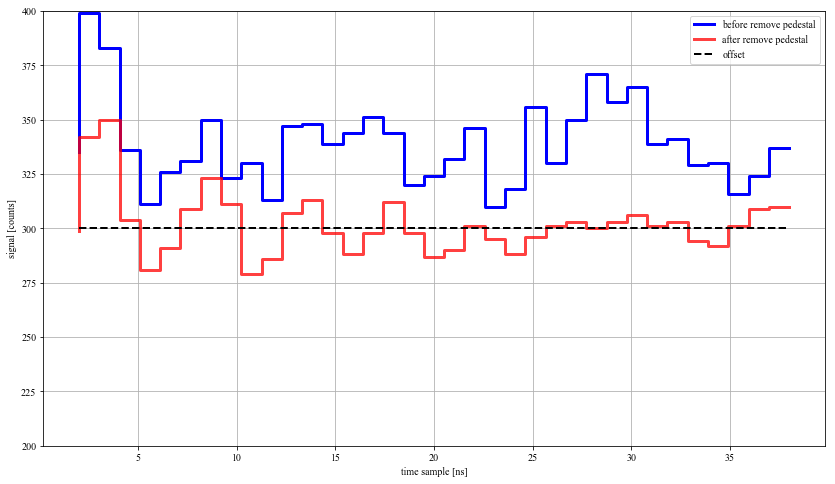

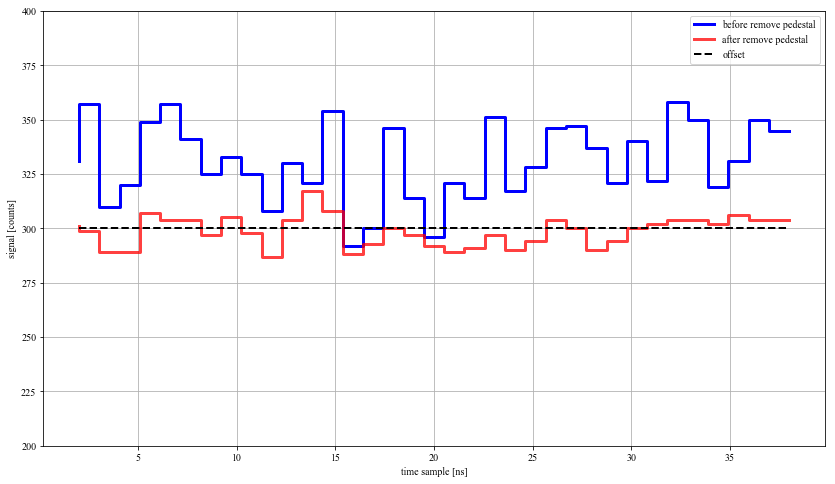

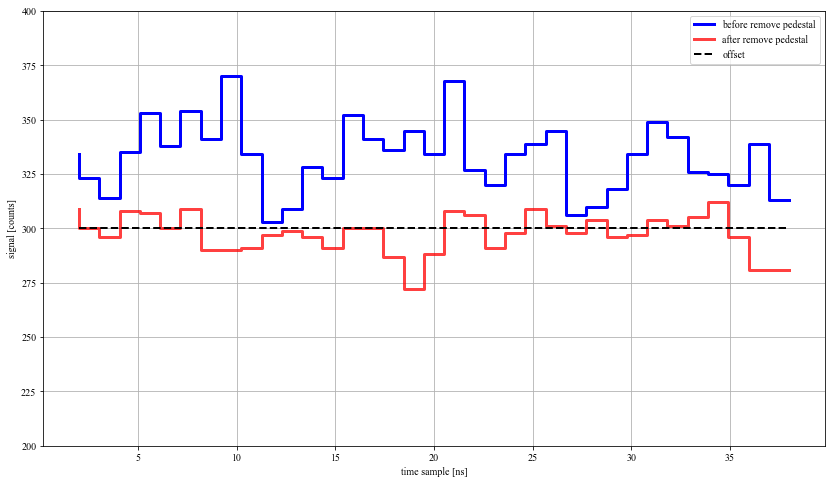

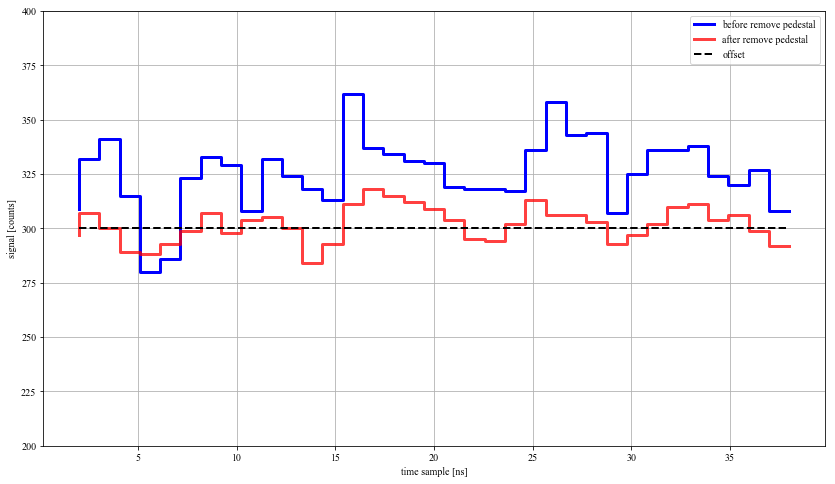

In [9]:
plt.rcParams['figure.figsize'] = (14, 8)

reader = LSTEventSource(input_url=path_to_data)
seeker = EventSeeker(reader)
pixel = 0
hg = 0
lg = 1
N = 10
nr = nr_module

waveform_before_remove_pedestal = np.zeros((N, 2, 7, 40))
waveform_after_remove_pedestal = np.zeros((N, 2, 7, 40))

for i in range(5000, 5000+N):
    
    t = np.linspace(2, 38, 36)
    ev = seeker[i]
    fig, ax = plt.subplots()
    ax.step(t, ev.r0.tel[0].waveform[hg, nr * 7:(nr + 1) * 7, 2:38][pixel], color="blue", label="before remove pedestal", lw=3)
    waveform_before_remove_pedestal[i-5000, hg, pixel, :] = ev.r0.tel[0].waveform[hg, nr * 7:(nr + 1) * 7, :][pixel]
    remove_pedestal(ev, ped, nr)
    waveform_after_remove_pedestal[i-5000, hg, pixel, :] = ev.r0.tel[0].waveform[hg, nr * 7:(nr + 1) * 7, :][pixel]
    ax.step(t, ev.r0.tel[0].waveform[hg, nr * 7:(nr + 1) * 7, 2:38][pixel], color="red", label="after remove pedestal", lw=3, alpha=0.75)
    ax.plot([2, 38], [300, 300], 'k--', label="offset", lw=2)
    ax.set_xlabel("time sample [ns]")
    ax.set_ylabel("signal [counts]")
    ax.set_ylim([200, 400])
    ax.grid()
    ax.legend()
    plt.show()

In [21]:
ped.rms[0, :, :]
for p in range(0, 7):
    print("p = {} mean = {}".format(p, np.mean(ped.rms[0, p, :])))

p = 0 mean = nan
p = 1 mean = nan
p = 2 mean = nan
p = 3 mean = nan
p = 4 mean = nan
p = 5 mean = nan
p = 6 mean = nan


## Pedestal distribution of pixel=0 before and after basic pedestal subtraction (module 96)

In [ ]:
std_before = np.std(waveform_before_remove_pedestal[:, 0, pixel, 2:38].ravel())
print("std = {} before remove pedestal".format(std_before))
std_after = np.std(waveform_after_remove_pedestal[:, 0, pixel, 2:38].ravel())
print("std = {} after remove pedestal".format(std_after))
fig, ax0 = plt.subplots()
ax0.hist(waveform_before_remove_pedestal[:, 0, pixel, 2:38].ravel(), bins=50, color="blue", label="before remove pedestal")
ax0.hist(waveform_after_remove_pedestal[:, 0, pixel, 2:38].ravel(), bins=50, color="red", alpha=0.75, label="after remove pedestal")
ax0.set_xlabel("signal [counts]")
ax0.set_ylabel("number of events")
ax0.grid()
ax0.legend()
plt.show()

## Individual cell baseline of capacitor (module 0)

In [ ]:
plt.rcParams['figure.figsize'] = (14, 8)

fig, ax0 = plt.subplots()
cap = np.linspace(0, 4*1023, 4*1024)
ax0.errorbar(cap, ped.meanped[0, 0, 0:4*1024], yerr=ped.rms[0, 0, 0:4*1024], fmt="o", 
             color="blue", ecolor="g", markersize=2)
ax0.set_xlabel("DRS4 capacitor")
ax0.set_ylabel("Cell offset mean and RMS [counts]")
ax0.grid()
plt.show()

In [ ]:
fig, ax0 = plt.subplots()
cap = np.linspace(0, 4*1023, 4*1024)
ax0.errorbar(cap, ped.meanped[0, 0, 0:4*1024], yerr=ped.rms[0, 0, 0:4*1024], fmt="o", 
             color="blue", ecolor="g", markersize=5)
ax0.set_xlabel("DRS4 capacitor")
ax0.set_ylabel("Cell offset mean and RMS [counts]")
ax0.set_xlim([450, 550])
ax0.grid()
plt.show()

# Remove pedestal: module = 96, pixel = 0, high gain

In [2]:
reader = LSTEventSource(input_url=path_to_data)
seeker = EventSeeker(reader)

nr_module = 96
ped = DragonPedestal()

for i in range(0, 5000):
    ev = seeker[i]
    ped.fill_pedestal_event(ev, nr_module)

ped.finalize_pedestal()

NameError: name 'path_to_data' is not defined

## Waveform of an event for pixel 0 before and after basic pedestal correction (module 96)

/home/pawel1/anaconda3/envs/cta-dev/lib/python3.6/site-packages/protozfits/__init__.py:56: UserWarning:         Multiple open zfits files at the same time are not supported.
        Reading from mutliple open tables at the same time will reset these
        tables continously and you will read always the same events.
        
  ''')


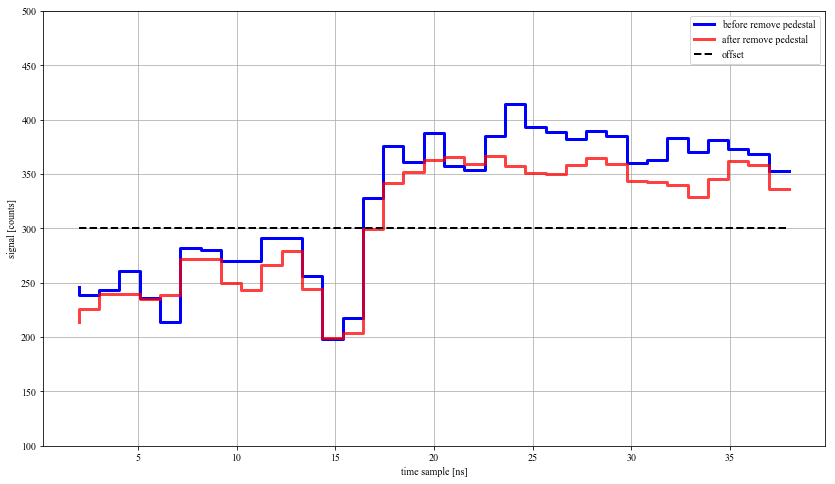

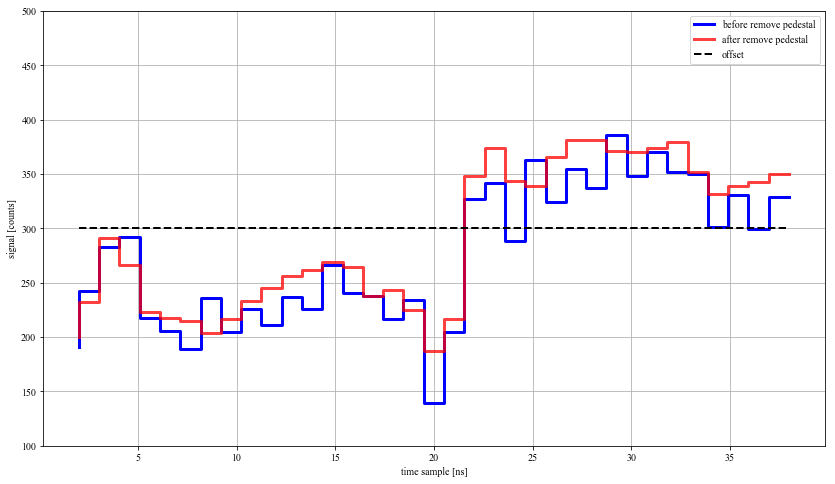

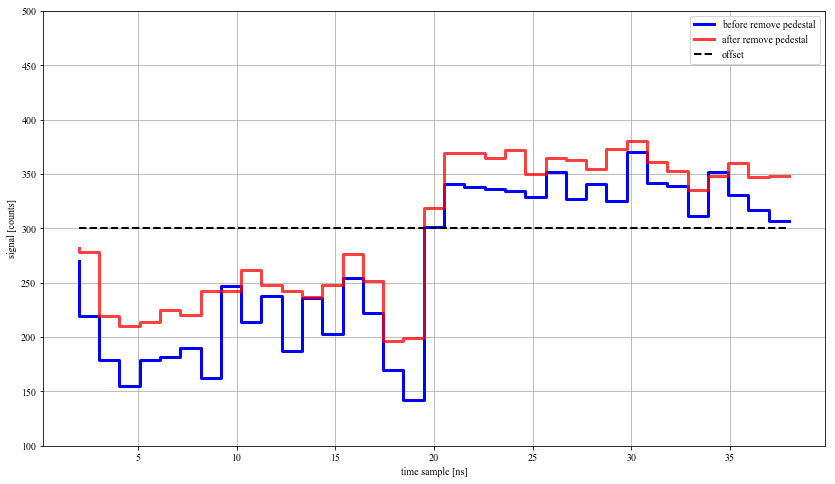

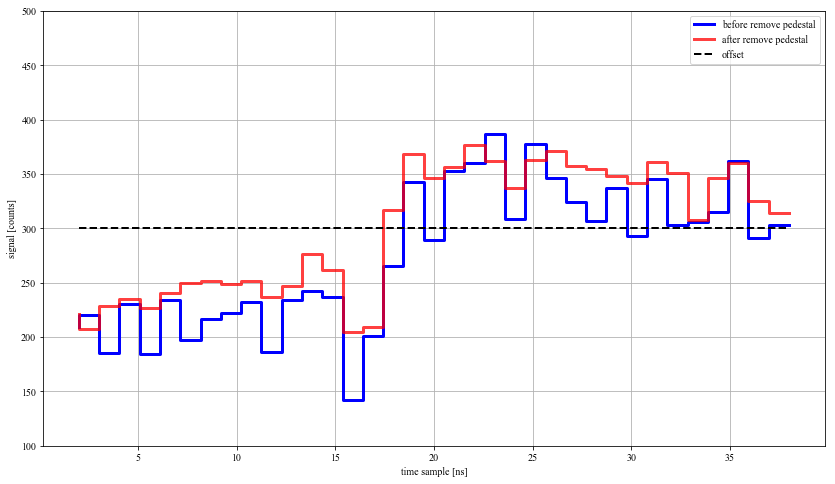

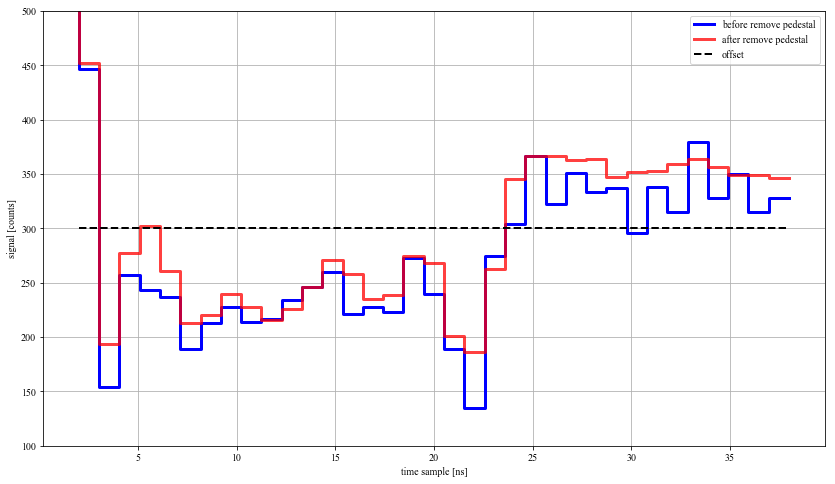

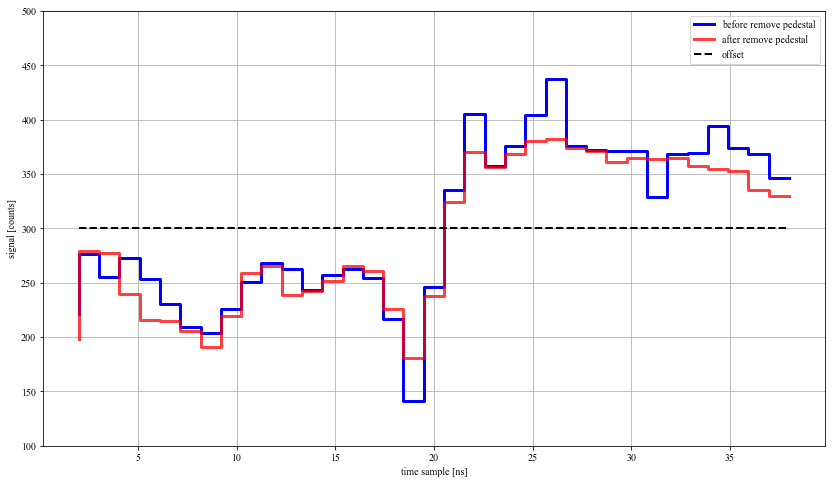

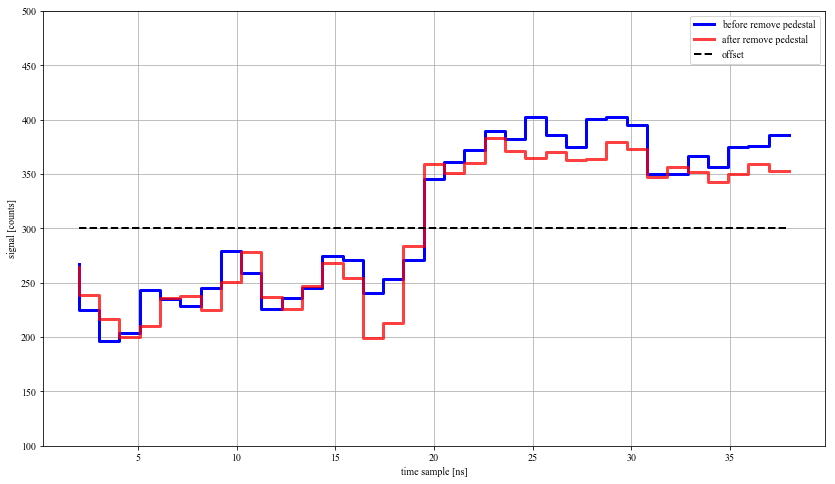

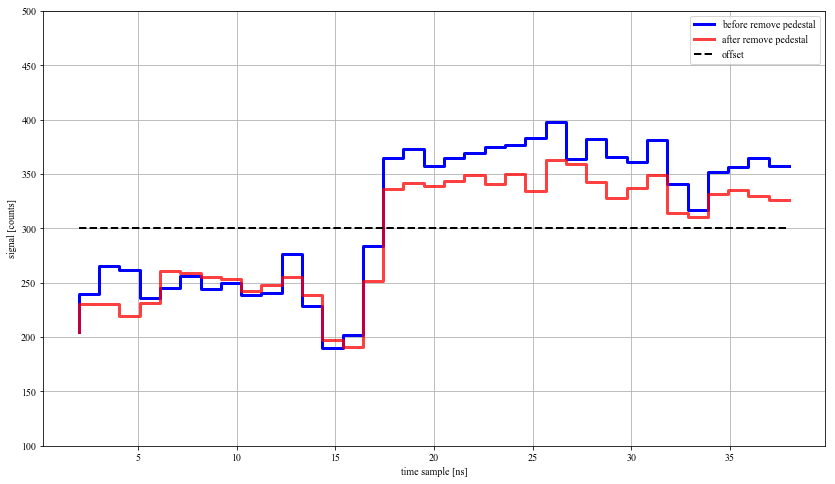

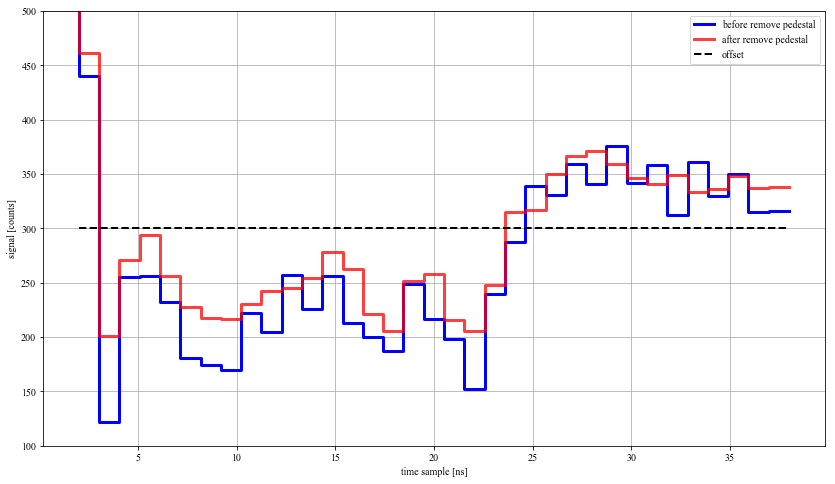

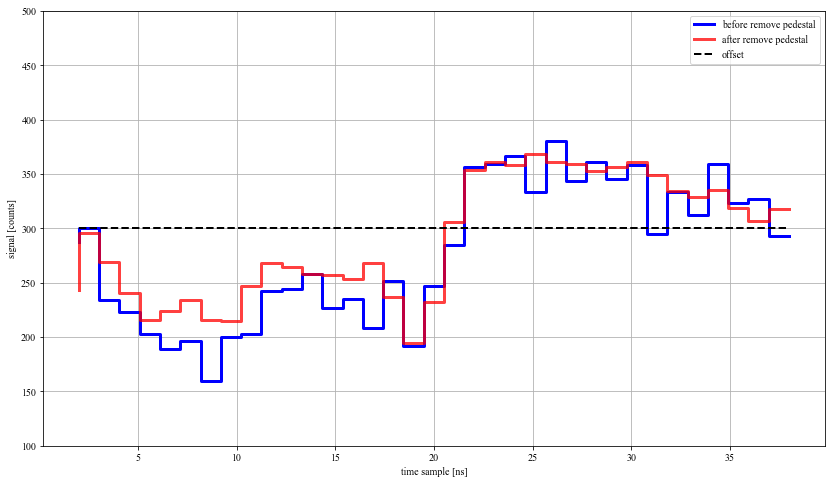

In [6]:
plt.rcParams['figure.figsize'] = (14, 8)

reader = LSTEventSource(input_url=path_to_data)
seeker = EventSeeker(reader)
pixel = 0
hg = 0
lg = 1
N = 10
nr = nr_module

waveform_before_remove_pedestal = np.zeros((N, 2, 7, 40))
waveform_after_remove_pedestal = np.zeros((N, 2, 7, 40))

for i in range(5000, 5000+N):
    
    t = np.linspace(2, 38, 36)
    ev = seeker[i]
    fig, ax = plt.subplots()
    ax.step(t, ev.r0.tel[0].waveform[hg, nr * 7:(nr + 1) * 7, 2:38][pixel], color="blue", label="before remove pedestal", lw=3)
    waveform_before_remove_pedestal[i-5000, hg, pixel, :] = ev.r0.tel[0].waveform[hg, nr * 7:(nr + 1) * 7, :][pixel]
    remove_pedestal(ev, ped, nr)
    waveform_after_remove_pedestal[i-5000, hg, pixel, :] = ev.r0.tel[0].waveform[hg, nr * 7:(nr + 1) * 7, :][pixel]
    ax.step(t, ev.r0.tel[0].waveform[hg, nr * 7:(nr + 1) * 7, 2:38][pixel], color="red", label="after remove pedestal", lw=3, alpha=0.75)
    ax.plot([2, 38], [300, 300], 'k--', label="offset", lw=2)
    ax.set_xlabel("time sample [ns]")
    ax.set_ylabel("signal [counts]")
    ax.set_ylim([100, 500])
    ax.grid()
    ax.legend()
    plt.show()

## Pedestal distribution of pixel=0 before and after basic pedestal subtraction (module 96)

In [ ]:
std_before = np.std(waveform_before_remove_pedestal[:, 0, pixel, 2:38].ravel())
print("std = {} before remove pedestal".format(std_before))
std_after = np.std(waveform_after_remove_pedestal[:, 0, pixel, 2:38].ravel())
print("std = {} after remove pedestal".format(std_after))
fig, ax0 = plt.subplots()
ax0.hist(waveform_before_remove_pedestal[:, 0, pixel, 2:38].ravel(), bins=50, color="blue", label="before remove pedestal")
ax0.hist(waveform_after_remove_pedestal[:, 0, pixel, 2:38].ravel(), bins=50, color="red", alpha=0.75, label="after remove pedestal")
ax0.set_xlabel("signal [counts]")
ax0.set_ylabel("number of events")
ax0.grid()
ax0.legend()
plt.show()

In [7]:
ped.rms[0, :, :]
for p in range(0, 7):
    print("p = {} mean = {}".format(p, np.mean(ped.rms[0, p, :])))

p = 0 mean = 67.40001286581636
p = 1 mean = 56.49363985859359
p = 2 mean = 68.04007798075429
p = 3 mean = 72.15638339248798
p = 4 mean = 64.65083372577159
p = 5 mean = 63.77859123417937
p = 6 mean = 59.42219687810411


## Individual cell baseline of capacitor (module 96)

In [ ]:
plt.rcParams['figure.figsize'] = (14, 8)

fig, ax0 = plt.subplots()
cap = np.linspace(0, 4*1023, 4*1024)
ax0.errorbar(cap, ped.meanped[0, 0, 0:4*1024], yerr=ped.rms[0, 0, 0:4*1024], fmt="o", 
             color="blue", ecolor="g", markersize=2)
ax0.set_xlabel("DRS4 capacitor")
ax0.set_ylabel("Cell offset mean and RMS [counts]")
ax0.grid()
plt.show()

In [ ]:
fig, ax0 = plt.subplots()
cap = np.linspace(0, 4*1023, 4*1024)
ax0.errorbar(cap, ped.meanped[0, 0, 0:4*1024], yerr=ped.rms[0, 0, 0:4*1024], fmt="o", 
             color="blue", ecolor="g", markersize=5)
ax0.set_xlabel("DRS4 capacitor")
ax0.set_ylabel("Cell offset mean and RMS [counts]")
ax0.set_xlim([450, 550])
ax0.grid()
plt.show()